In [21]:
import pandas as pd
import json
import os
from tqdm import tqdm

In [22]:
file_name = "GSM7790861_RG:Z:AAACCCTGAGTTCTCC_chr1.json"
file_path = os.path.join('profile', file_name)

def find_max_segment(data, segment_length=2000):
    max_sum = -1
    max_start = 0
    
    for i in tqdm(range(len(data) - segment_length + 1)):
        current_sum = sum(data[i:i + segment_length])
        if current_sum > max_sum:
            max_sum = current_sum
            max_start = i
    
    max_end = max_start + segment_length - 1 
    return max_start, max_end, max_sum

with open(file_path, 'r') as file:
    data = json.load(file)

for rg, chr_data in data.items():
    for chr_key, values in chr_data.items():
        print(f"Обработка RG={rg}, chr={chr_key}")
        start, end, max_sum = find_max_segment(values, segment_length=2000)
        
        result = {
            "RG": rg,
            "chr": chr_key,
            "start": start,
            "end": end,
            "max_sum": max_sum
        }

result
    

Обработка RG=RG:Z:AAACCCTGAGTTCTCC, chr=chr1


100%|█████████████████████████████████████████████████████████████| 248944424/248944424 [57:11<00:00, 72539.96it/s]


{'RG': 'RG:Z:AAACCCTGAGTTCTCC',
 'chr': 'chr1',
 'start': 64470145,
 'end': 64472144,
 'max_sum': 5319}

In [26]:
data['RG:Z:AAACCCTGAGTTCTCC']['chr1'][64470145:64472144]

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


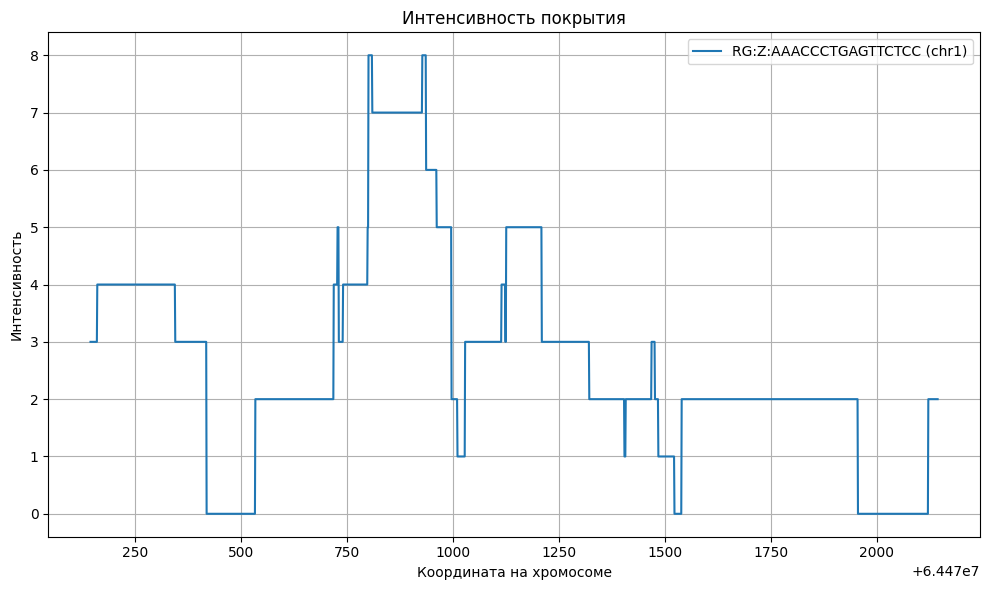

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import json

# Параметры интервала и файла JSON
rg = 'RG:Z:AAACCCTGAGTTCTCC'
chromosome = 'chr1'
start = 64470145
end = 64472144
json_file = f"profile/GSM7790861_{rg}_{chromosome}.json"

# Чтение данных из JSON
with open(json_file, 'r') as f:
    data = json.load(f)

# Извлечение интенсивностей
intensities = data[rg][chromosome]

# Извлечение интенсивностей для указанного интервала
interval_intensities = intensities[start:end + 1]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(range(start, end + 1), interval_intensities, label=f"{rg} ({chromosome})")
plt.title("Интенсивность покрытия")
plt.xlabel("Координата на хромосоме")
plt.ylabel("Интенсивность")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Сохранение или показ графика
plt.show()


In [17]:
import os
import json

# Параметры интервала
chromosome = 'chr1'
start = 64470145
end = 64472144
profile_dir = "profile"  # Директория с JSON-файлами

# Функция для извлечения интенсивностей из JSON
def get_intensity_in_interval(rg, chromosome, start, end, profile_dir):
    json_file = os.path.join(profile_dir, f"GSM7790861_{rg}_{chromosome}.json")
    if not os.path.exists(json_file):
        print(f"Файл {json_file} не найден.")
        return None
    
    with open(json_file, 'r') as f:
        data = json.load(f)

    # Извлекаем массив интенсивностей
    intensities = data[rg][chromosome]

       # Извлечение интенсивностей для указанного интервала
    return intensities[start:end + 1]

# Поиск всех RG в директории
rg_list = [file.split('_')[1] for file in os.listdir(profile_dir) if file.endswith(f"_{chromosome}.json")]
print(f"Найдено {len(rg_list)} RG для {chromosome}.")

# Сбор данных интенсивности для всех RG
all_rg_intensities = {}
for rg in tqdm(rg_list):
    intensities = get_intensity_in_interval(rg, chromosome, start, end, profile_dir)
    if intensities is not None:
        all_rg_intensities[rg] = intensities

print(f"Собрано данных для {len(all_rg_intensities)} RG.")


Найдено 100 RG для chr1.


100%|████████████████████████████████████████████████████████████████████████████| 100/100 [28:23<00:00, 17.03s/it]

Собрано данных для 100 RG.


In [8]:
df.head()

,RG,chr,intensities
0,RG:Z:AGGCGATGAAGAGGCT,chr1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,RG:Z:CTCTATAACGGAATTA,chr1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,RG:Z:GGGCTTCGAGCGCTGT,chr1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,RG:Z:TCCTCATCTGATCATC,chr1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [7]:
import os

name = 'GSM7790861'
path = os.path.expanduser('~/MyMACS2/data/ATAC/RG_aligns/data_GSE')

db_top100_cells = pd.read_csv(f'{path}/{name}_top_100_rg_coordinates_of_reads.csv')
db_top100_cells.columns = ['RN', 'chr', 'x', 'y', 'RG', 'strand1', 'strand2']
db_top100_cells = db_top100_cells[['RG', 'chr', 'x', 'y']]

In [9]:
db_top100_cells.head()

,RG,chr,x,y
0,RG:Z:GGCTTCTACCGGTACC,chr1,9997,10392
1,RG:Z:GGCTTCTACCGGTACC,chr1,9997,10215
2,RG:Z:CGCTTAAGAAGAGGCT,chr1,9997,10411
3,RG:Z:AGGCGATGAAGAGGCT,chr1,10004,10083
4,RG:Z:AACCAACACGAGCCTC,chr1,10004,10083


In [12]:
db_top100_cells[db_top100_cells['chr'] == 'chr3']['y'].max()

np.int64(198235140)

In [20]:
len(data['RG:Z:AAACCCTGAGTTCTCC'][chromosome])

248946424